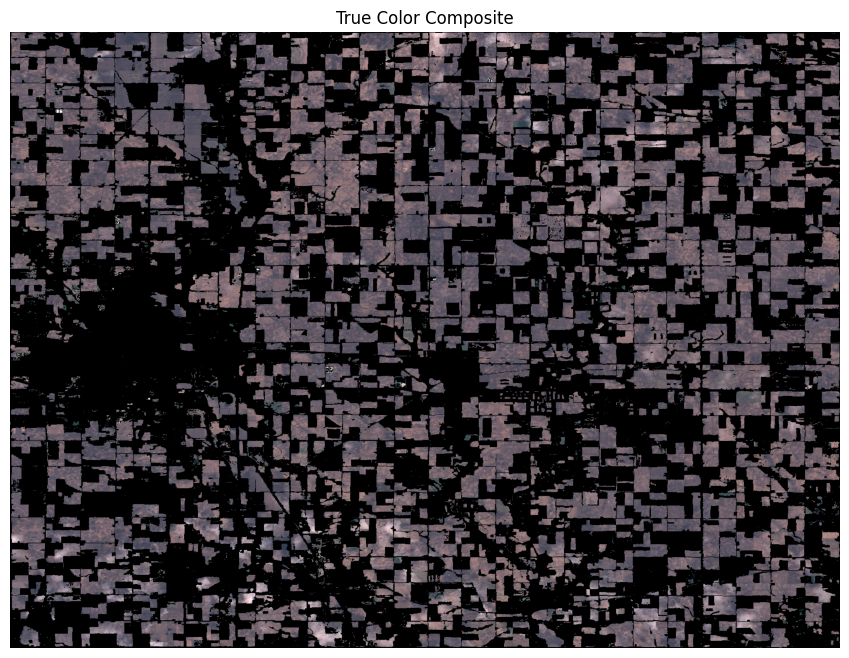

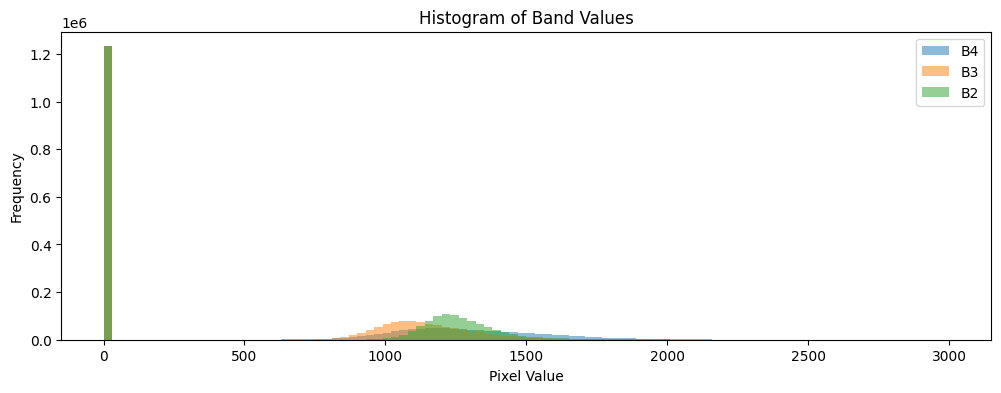

In [30]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

file_path = r'C:\Users\tskor\Documents\GitHub\inovation_project\0_Data\MODIS_data\sat\argentina_sat_catrilo-la pampa_2000-01-01_2016-12-31.tif'
# Open the GeoTIFF file

# Define visualization parameters
vis_params = {
    "min": 0,
    "max": 3000,
    "bands": ["B4", "B3", "B2"],
}

# Map band names to band numbers (adjust these based on your file's structure)
band_map = {
    "B1": 1, "B2": 2, "B3": 3, "B4": 4, "B5": 5, "B6": 6, "B7": 7
}
with rasterio.open(file_path) as src:
    # Read the specified bands
    rgb = np.dstack([src.read(band_map[band]) for band in vis_params["bands"]])

    # Replace NaN with 0
    rgb = np.nan_to_num(rgb, nan=0.0)

    # Clip values to the specified range
    rgb = np.clip(rgb, vis_params["min"], vis_params["max"])

    # Normalize the data to 0-1 range
    rgb_normalized = (rgb - vis_params["min"]) / (vis_params["max"] - vis_params["min"])

    # Plot the image
    plt.figure(figsize=(12, 8))
    plt.imshow(rgb_normalized)
    plt.axis('off')
    plt.title("True Color Composite")
    plt.show()

    # Optionally, you can also display the histogram
    plt.figure(figsize=(12, 4))
    for i, band in enumerate(vis_params["bands"]):
        plt.hist(rgb[:,:,i].ravel(), bins=100, alpha=0.5, label=band)
    plt.legend()
    plt.title("Histogram of Band Values")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

In [20]:
np.count_nonzero(~np.isnan(red))

1003322

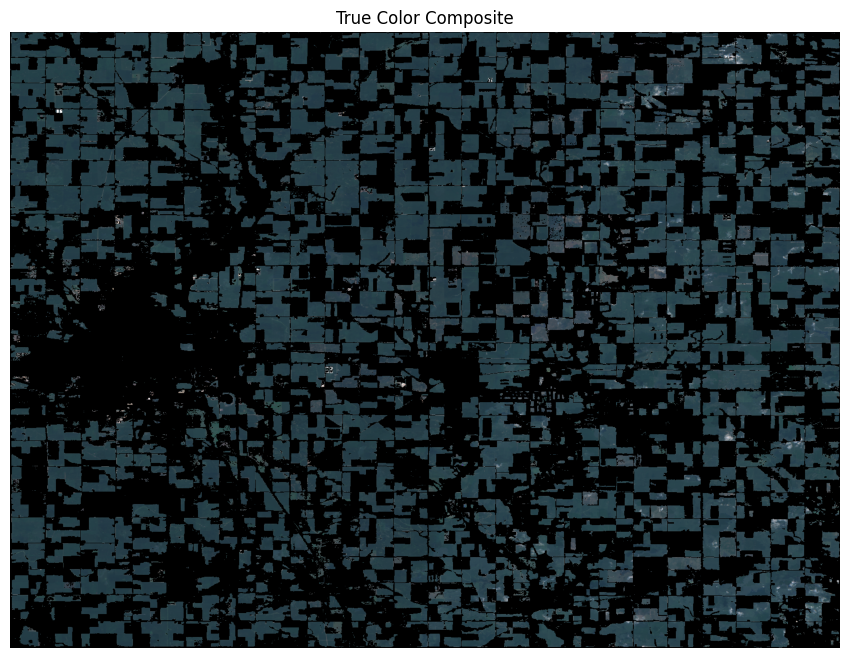

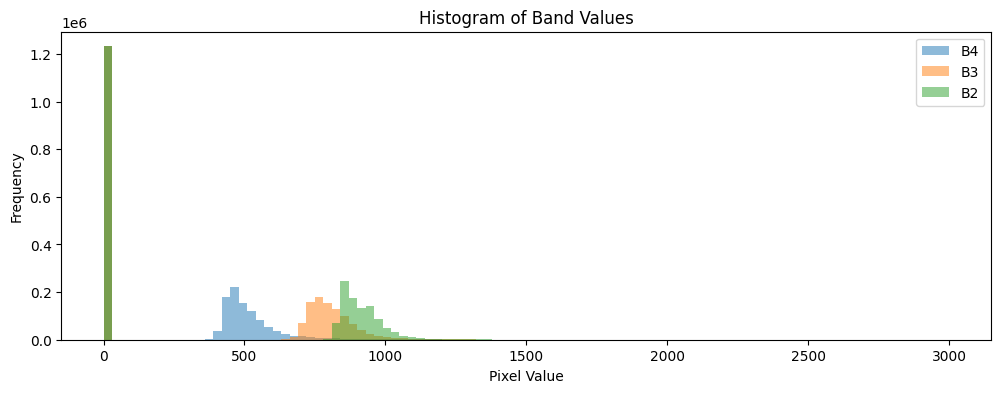

In [31]:
file_path = r'C:\Users\tskor\Documents\GitHub\inovation_project\0_Data\MODIS_data\sat\images_Story_2017_7-8.tif'
# Open the GeoTIFF file
# Open the GeoTIFF file

# Define visualization parameters
vis_params = {
    "min": 0,
    "max": 3000,
    "bands": ["B4", "B3", "B2"],
}

# Map band names to band numbers (adjust these based on your file's structure)
band_map = {
    "B1": 1, "B2": 2, "B3": 3, "B4": 4, "B5": 5, "B6": 6, "B7": 7
}
with rasterio.open(file_path) as src:
    # Read the specified bands
    rgb = np.dstack([src.read(band_map[band]) for band in vis_params["bands"]])

    # Replace NaN with 0
    rgb = np.nan_to_num(rgb, nan=0.0)

    # Clip values to the specified range
    rgb = np.clip(rgb, vis_params["min"], vis_params["max"])

    # Normalize the data to 0-1 range
    rgb_normalized = (rgb - vis_params["min"]) / (vis_params["max"] - vis_params["min"])

    # Plot the image
    plt.figure(figsize=(12, 8))
    plt.imshow(rgb_normalized)
    plt.axis('off')
    plt.title("True Color Composite")
    plt.show()

    # Optionally, you can also display the histogram
    plt.figure(figsize=(12, 4))
    for i, band in enumerate(vis_params["bands"]):
        plt.hist(rgb[:,:,i].ravel(), bins=100, alpha=0.5, label=band)
    plt.legend()
    plt.title("Histogram of Band Values")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()